In [1]:
 #Importaremos la mayoria de modulos que se utilizaran a lo largo de la práctica

# Modulos basicos
import pandas as pd
import numpy as np
import csv
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-darkgrid')

# Modulos de scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, precision_score, accuracy_score 
from sklearn import preprocessing

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import  roc_auc_score, roc_curve, make_scorer, mean_squared_error
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import KernelPCA
from sklearn.decomposition import FastICA
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.manifold import TSNE
from sklearn.feature_selection import chi2
from sklearn import feature_selection
from sklearn.metrics import r2_score 
from sklearn.model_selection import GridSearchCV

#Balanceo
from imblearn.over_sampling import SMOTE

# Statmodels
import statsmodels.formula.api as smf
from statsmodels.gam.api import GLMGam, BSplines

In [2]:

f= open("risk_factors_cervical_cancer.csv")
reader = csv.reader(f)


In [3]:
data = pd.read_csv(f, sep=',', na_values='?')

## Analisis exploratorio de datos

Inicialmente miramos la cantidad de datos perdidos con la que cuenta nuestra base de datos para cada una de las variebles, donde es necesario hacer una imputación.

In [4]:
data.isna().sum()

Age                                     0
Number of sexual partners              26
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:Hepatitis B                  

Eliminamos&nbsp;las&nbsp;columnas&nbsp;menos&nbsp;relevantes&nbsp;debido a que tienen muchos valores NaNs o a que representan poca relevancia para los resultados. 

In [5]:
del(data['STDs: Time since first diagnosis'])
del(data['STDs: Time since last diagnosis'])
del(data['STDs:AIDS'])
del(data['STDs:cervical condylomatosis'])

In [6]:
pd.set_option("max_columns", None)
data

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0
2,34,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0
854,32,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0
855,25,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,1,0
856,33,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0


Observamos que nuestra variable respuesta Biopsy esta muy desbalanceada debido a que la cantidad de 0's es 803 y la cantidad de 1's es 55, por lo cual procederemos a hacer una imputacion y utilizaremos el SMOTE para balancear los datos y obtener mejores resultados.

In [7]:
data.columns

Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
       'STDs:vaginal condylomatosis', 'STDs:vulvo-perineal condylomatosis',
       'STDs:syphilis', 'STDs:pelvic inflammatory disease',
       'STDs:genital herpes', 'STDs:molluscum contagiosum', 'STDs:HIV',
       'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
       'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller',
       'Citology', 'Biopsy'],
      dtype='object')

In [8]:
data['Biopsy'].value_counts()

0    803
1     55
Name: Biopsy, dtype: int64

Realizamos la imputación, es decir, cambiamos todos los valores de NaNs por la media de cada columna.

In [9]:
imputer = SimpleImputer(strategy='median')

Newdata = imputer.fit_transform(data) # Ajusta y transforma
print(Newdata)
Newdata2 = pd.DataFrame(Newdata, columns=data.columns)

[[18.  4. 15. ...  0.  0.  0.]
 [15.  1. 14. ...  0.  0.  0.]
 [34.  1. 17. ...  0.  0.  0.]
 ...
 [25.  2. 17. ...  0.  1.  0.]
 [33.  2. 24. ...  0.  0.  0.]
 [29.  2. 20. ...  0.  0.  0.]]


Ahora procedemos a verificar que todos los NaN se hayan eliminado, la sumatoria de NaNs en cada uno deberia dar 0:

In [10]:
Newdata2.isna().sum()

Age                                   0
Number of sexual partners             0
First sexual intercourse              0
Num of pregnancies                    0
Smokes                                0
Smokes (years)                        0
Smokes (packs/year)                   0
Hormonal Contraceptives               0
Hormonal Contraceptives (years)       0
IUD                                   0
IUD (years)                           0
STDs                                  0
STDs (number)                         0
STDs:condylomatosis                   0
STDs:vaginal condylomatosis           0
STDs:vulvo-perineal condylomatosis    0
STDs:syphilis                         0
STDs:pelvic inflammatory disease      0
STDs:genital herpes                   0
STDs:molluscum contagiosum            0
STDs:HIV                              0
STDs:Hepatitis B                      0
STDs:HPV                              0
STDs: Number of diagnosis             0
Dx:Cancer                             0


#### Matriz de correlación de la base de datos Original. 
Encontramos que las variables Dx:Cancer y Dx:HPV estan correlacionadas positivamente, la variable STPs: Número de diagnostico con las variables STDs y STDs: número se encuentrasn correlacionadas positivamente, la varible STDs:Condylomatosis esta correlacionada posivamente con STDs: número y STDs: vulvo perineal. Por ultimo demonos cuenta que las variables que no cuentan con alguna relación son el número de parejas sexuales y la primera relación sexual.

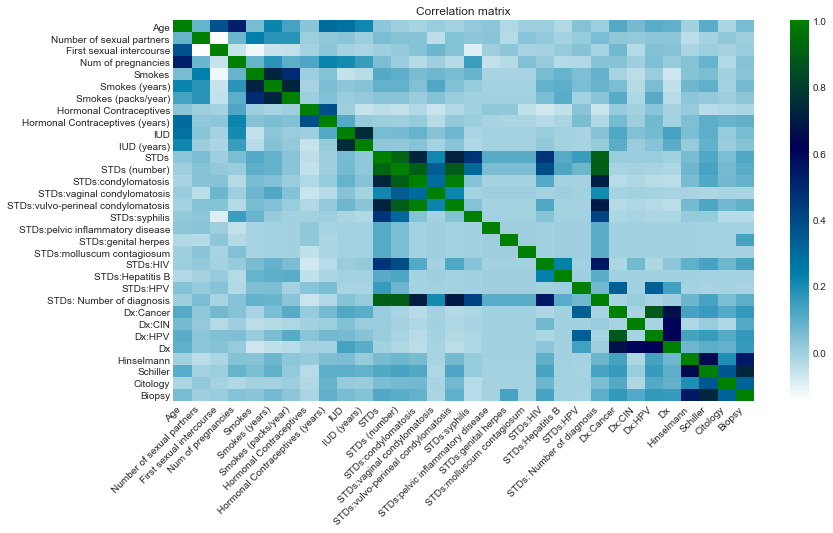

In [11]:
# Grafica de correlación base de datos balanceada 
f,ax = plt.subplots(figsize=(13,7))
sns.heatmap(Newdata2.corr(),cmap = 'ocean_r', annot=False, cbar=True )
ax.set_title('Correlation matrix')

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 10)

plt.show()

In [ ]:


sns.pairplot(Newdata2, x_vars=[ 'STDs', 'STDs (number)', 'STDs:condylomatosis',
         'STDs:vulvo-perineal condylomatosis',
         'STDs: Number of diagnosis',
       'Dx:Cancer',   'Dx:HPV', 'Biopsy'], y_vars=[ 'STDs', 'STDs (number)', 'STDs:condylomatosis',
         'STDs:vulvo-perineal condylomatosis',
         'STDs: Number of diagnosis',
       'Dx:Cancer',   'Dx:HPV'], height=5, aspect=0.7,hue="Biopsy")
plt.show()

### Partición de la base de datos (Train y Test)

Se realiza una partición dos dataFrame de entrenamiento y prueba, donde con el de entrenamiento realizaremos un balanceo de la base de datos, recordemos que separaremos un test con 5 filas en donde la variable respuesta Biopsy sea 1.

In [ ]:
Newdata_0=[]
Newdata_1=[]
for i in range(len(Newdata2["Biopsy"])):
    if Newdata2["Biopsy"][i]==0:
        Newdata_0.append(Newdata2.iloc[i])
    else:
        Newdata_1.append(Newdata2.iloc[i])

Newdata_0 = pd.DataFrame(Newdata_0, columns=data.columns)
Newdata_1 = pd.DataFrame(Newdata_1, columns=data.columns)

In [ ]:
#Particion de los datos usando como variable de respuesta Biopsy y como descriptores el resto de la base de datos.
y_0=Newdata_0["Biopsy"]
del(Newdata_0["Biopsy"])
X_0=Newdata_0

y_1=Newdata_1["Biopsy"]
del(Newdata_1["Biopsy"])
X_1=Newdata_1

In [ ]:
X_train_0, X_test_0, y_train_0, y_test_0 = train_test_split( X_0,y_0, test_size=0.25, random_state=123)
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split( X_1,y_1, test_size=0.09, random_state=123)

In [ ]:
len(X_train_1)

In [ ]:
X_train = [] 
X_train=X_train_0 
X_train=X_train.append(X_train_1,ignore_index=True) 

y_train = [] 
y_train=y_train_0 
y_train=y_train.append(y_train_1,ignore_index=True) 

X_test = [] 
X_test=X_test_0 
X_test=X_test.append(X_test_1,ignore_index=True) 

y_test = [] 
y_test=y_test_0 
y_test=y_test.append(y_test_1,ignore_index=True) 


### Balanceo (SMOTE)

Se va a realizar el balanceo con que la cantidad de las valores minoritarios de la variable respuesta en esta caso los 1's aumenten hasta cumplir que sea el 25% de la cantidade de los 0's.

In [ ]:
sm = SMOTE(random_state=42, sampling_strategy=0.35)
X_res1, y_res = sm.fit_resample(X_train, y_train)
X_res = X_res1

In [ ]:
y_res.value_counts()


In [ ]:
X_n= X_res1.assign(Biopsy = y_res)
dft = pd.DataFrame(X_n )

In [ ]:
X_res

In [ ]:
sns.pairplot(dft, x_vars=[ 'STDs', 'STDs (number)', 'STDs:condylomatosis',
         'STDs:vulvo-perineal condylomatosis',
         'STDs: Number of diagnosis',
       'Dx:Cancer',   'Dx:HPV', 'Biopsy'], y_vars=[ 'STDs', 'STDs (number)', 'STDs:condylomatosis',
         'STDs:vulvo-perineal condylomatosis',
         'STDs: Number of diagnosis',
       'Dx:Cancer',   'Dx:HPV', 'Biopsy'], height=5, aspect=0.7,hue="Biopsy")
plt.show()

In [ ]:
dft.describe()

### Feacture Selection 

Realizamos una regresión inicial para tomar las variables más significativas y realizar un análisis de estas con la variable respuesta, para esto utilizaremos Feature-Selection

In [ ]:
seleccion = feature_selection.f_regression(X_res,y_res)
F, p = seleccion
pd.DataFrame(dict(F = F, p = p),index = X_res.columns).sort_values(by=["F"],ascending=False)

In [ ]:
selector = feature_selection.SelectKBest(feature_selection.f_regression, k = 5)
X_train_sel = selector.fit_transform(X_res,y_res)

In [ ]:
sel_index =  selector.get_support() # indice de variables seleccionadas (booleana)
pd.DataFrame(X_train_sel, columns = X_train.columns[sel_index]).head() # Dataframe para visualizar mejor

Notemos que las mejores variables con las que se puede dar una predicción con respecto a la varible respuesta Biopsy son categoricas. 

In [ ]:
# visualiza la relación entre las características y la respuesta usando diagramas de dispersión
#sns.pairplot(dft,hue="Biopsy")
#plt.show()

#### Estandarización

In [ ]:
#X_res= StandardScaler().fit_transform(X_res)

## Reducción de la dimensión 
#### PCA
Realizaremos una reducción de la dimensión mediante PCA y observaremos como se distribuyen en los componentes principales.

In [ ]:
sklearn_pca = PCA(n_components=2)
data22 = pd.DataFrame(X_res)
Y_sklearn = sklearn_pca.fit_transform(X_res)
#modelo_pca = sklearn_pca.named_steps['pca']

In [ ]:
print(sklearn_pca.explained_variance_) 
print(sklearn_pca.singular_values_)

In [ ]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    for lab, col, d in zip((0,1), 
                        ('blue', 'red'), ("Biopsy = 0","Biopsy = 1")):
        plt.scatter(Y_sklearn[y_res==lab, 0],
                    Y_sklearn[y_res==lab, 1],
                    label= d,
                    c=col)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='lower right')
    plt.tight_layout()
    plt.show()

#### Kernel PCA

In [ ]:
scikit_kpca = KernelPCA(n_components=1, kernel='rbf', gamma=15)
X_skernpca = scikit_kpca.fit_transform(X_res)


plt.figure(figsize=(8,6))
plt.scatter(X_skernpca[y_res ==0, 0], np.zeros((602,1)), color='red', alpha=0.5,label="Biopsy = 0")
plt.scatter(X_skernpca[y_res ==1, 0], np.zeros((210,1)), color='blue', alpha=0.5,label="Biopsy = 1")

#plt.text(-0.38, 0.37, 'gamma = 15', fontsize=12)
plt.title('Componentes Principales con Kernel PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(loc='lower right')
plt.show()

In [ ]:
scikit_kpca = KernelPCA(n_components=2, kernel='rbf', gamma=15)
X_skernpca = scikit_kpca.fit_transform(X_res)


plt.figure(figsize=(8,6))
plt.scatter(X_skernpca[y_res ==0, 0], X_skernpca[y_res ==0, 1], color='red', alpha=0.5, label="Biopsy = 0")
plt.scatter(X_skernpca[y_res ==1, 0], X_skernpca[y_res ==1, 1], color='blue', alpha=0.5, label="Biopsy = 1")

#plt.text(-0.38, 0.37, 'gamma = 15', fontsize=12)
plt.title('First 2 principal components after RBF Kernel PCA via scikit-learn')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(loc='lower right')
plt.show()

#### T-Sne
T-Sne preserva la estructura de datos de cluster, donde según la preplejidad podemos obtener los cluster, Si la perplejidad es demasiado alta conduce a la fución de los grupos y si la perplejidad es demasiado pequeña separa los cluster y puede no tener sentido, entonces se debe buscar un número optimo de perplejidad.

In [ ]:
tsne = TSNE(n_components=2, verbose=1, random_state=123,perplexity=5)
z = tsne.fit_transform(X_res) 

In [ ]:
Biopsy_0 = z[y_res ==0]
Biopsy_1 = z[y_res ==1]
plt.scatter(Biopsy_0[:,0], Biopsy_0[:,1], c="b",label="Biopsy = 0")
plt.scatter(Biopsy_1[:,0], Biopsy_1[:,1], c="g",label="Biopsy = 1")
plt.legend()
plt.show()

### ICA

En ICA encontramos combinaciones lineales de variables como componentes independientes.

In [ ]:
# Creating ICA object
ICA = FastICA(n_components=2)
IndependentComponentValues=ICA.fit_transform(X_res)

#Creating the dataframe
print('####### Final Independent Components ######')
ReducedData=pd.DataFrame(data=IndependentComponentValues, columns= ['IC1','IC2'])
print(ReducedData.head(10))

In [ ]:
sns.scatterplot(x="IC1", y="IC2" ,  data=ReducedData).set(title="ICA") 

# Modelos de clasificación

Definimos la funcín para generar la matriz de confusion de los siguientes modelos de clasificació o que son utilizados para clasificar según la variable respuesta Biopsy (0: Saludable - No diagnosticado con cancer, 1: Cancer - diagnosticado con cancer) 

In [ ]:
# Funcion para calcular y visualizar la matriz de confusion 
def plotCM(ytrue, ypred, clases=None, normalize = False, ax = None):
    """ Funcion para calcular y visualizar la matriz de confusion"""
    
    if clases == None:
        clases = list(set(ytrue))
        clases.sort() # etiquetas unicas ordenadas alfabeticamente
    
    CM = confusion_matrix(ytrue,ypred, labels=clases)
    
    #Normaliza la matriz de confusion dividiendo cada fila por el total de verdaderos
    if normalize:
        CM = 100*CM / CM.sum(axis=1).reshape(-1,1) #Aprovechando el Broadcasting!
 
    df = pd.DataFrame(CM, index=clases, columns=clases)
    df.index.name = 'True'; df.columns.name = 'Predicted'
    
    sns.heatmap( df, # Visualizando la matriz de confusion
             annot=True, fmt='2.1f', cmap='ocean_r',cbar=False,square=True, annot_kws={'fontsize':16}, ax=ax )
    
    plt.show()

### Regresión logística

In [ ]:
scaler = preprocessing.StandardScaler().fit(X_res)
lrmodel = LogisticRegression(solver='lbfgs')
lrmodel.fit( scaler.transform(X_res),y_res )
y_pred1 = lrmodel.predict( scaler.transform(X_test) )

##### Matriz de confusión 
A partir de la matriz de confusión nos dimis cuenta que el 97% de la categoria 0's (Biopsia = Falso) esta bien clasificado como que en la persona salio negativo en su biopsia, es decir, no esta diagnosticado con cancer, pero el 3% de esa misma categoria esta clasificado erroneamente como su biopsia salio positiva, es decir, esta diagnosticado con cancer cuando en realidad no.Además, en la categoria de los 1's (Biopsia = True) el modelo  clasifico correctamente las 5 filas de la base original que tomamos como test, es decir, que el 100% de esa muestra de test esta diagnoticada con cancer.

In [ ]:
plotCM(y_test,y_pred1, normalize=True)

##### Presición del modelo
A pesar de que el modelo presenta una buena presición, tenemos que el coeficiente de determinación ó R cuadrado ajustado es negativo, lo que nos dice que el modelo no se ajusto muy bien a los datos dados.

In [ ]:
print("Presición del test es: {:.2f}".format( accuracy_score(y_test,y_pred1) ))
print("Coeficiente de determinación: {:.2f}".format(r2_score(y_test, y_pred1)))

### LASSO

In [ ]:
modelo = LassoCV( alphas = np.logspace(-10, 3, 200), normalize = True )
_ = modelo.fit(X = X_res, y = y_res)

In [ ]:
scorer = make_scorer(mean_squared_error, greater_is_better=False)

lasso_reg = Lasso()

prepare_predict_pipeline = Pipeline([ 
    ('predict', lasso_reg),
])

params = [
    {
     'predict__alpha':[0.0005]
    }
]

grid_search = GridSearchCV(prepare_predict_pipeline, param_grid=params, scoring=scorer, cv = 5, verbose=1)
grid_search.fit(X_res,y_res)

In [ ]:
y_pred2 = grid_search.predict( scaler.transform(X_test) ) 

In [ ]:
#plotCM(y_test,y_pred2, normalize=True)

### RIDGE

Inicialmente obtendremos el mejor de los alphas para poder hacer la regresión de ridge categorica utilizaremos validación cruzada para esto.

In [ ]:
#Generamos un amplio rango de alphas
alphas = 10**np.linspace(10,-2,100)
#Generamos el alpha con ayuda de validación cruzada
ridgecv = RidgeCV(alphas=alphas, cv=5, scoring='neg_mean_squared_error')
Ajs = ridgecv.fit(scaler.transform(X_res), y_res) # Ajustando al Training set


##### Alpha destacado con ayuda de valización cruzada

In [ ]:
#Destacamos el mejor alpha
Mejor_Alpha = ridgecv.alpha_
print("Mejor de los alphas: {:.2f}".format(Mejor_Alpha))

Regresión normal de rigde con alpha destacado

In [ ]:
ridge = Ridge(alpha=0.5)
ridge.fit(scaler.transform(X_res), y_res)
pd.Series(ridge.coef_, index= X_res.columns).sort_values(ascending=True)

In [ ]:
predi_ridge = ridge.predict(scaler.transform(X_test))

##### Matriz de confusión

In [ ]:
predi_ridge

In [ ]:
#plotCM(y_test,predi_ridge#, normalize=True)

In [ ]:
#print("Presición del test es: {:.2f}".format( accuracy_score(y_test,predi_ridge) ))
#print("Coeficiente de determinación: {:.2f}".format(r2_score(y_test, predi_ridge)))

### Análisis discriminante lineal

In [ ]:
model = LinearDiscriminantAnalysis().fit( X_res, y_res)
y_pred2 = model.predict(X_test)

##### Matriz de confusión

In [ ]:
plotCM(y_test,y_pred2, normalize=True)

##### Presición del modelo

In [ ]:
print("Presición del test es: {:.2f}".format( accuracy_score(y_test,y_pred2) ))
print("Coeficiente de determinación: {:.2f}".format(r2_score(y_test, y_pred2)))

### Naive Bayes

In [ ]:
gnb = GaussianNB()
y_pred = gnb.fit(X_res, y_res).predict(X_test)
print("Number of mislabeled points out of a total %d points : %d"% (X_test.shape[0], (y_test != y_pred).sum()))


### KNN

###  Modelo GLM

###  Modelo GAM

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=ab22eaaf-06f3-405f-9fcb-14fedb95aa5f' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>